In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

In [134]:
df = pd.read_csv('../combined.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop('Bus', axis=1)
df = df.drop('Uber', axis=1)
#df = df.drop('Taxi', axis=1)

y = 1
df.dtypes

Date         datetime64[ns]
Ridership           float64
Taxi                float64
dtype: object

In [137]:
def linear_regression_plot(df,y):
    
    df = df.copy()
    df = df.dropna(axis=0, how='any')
    
    for column in df.columns:
        if df[column].dtype == 'datetime64[ns]':
            df['delta'] = (df[column] - df[column].min()).astype('timedelta64[M]')
            df[column] = df['delta']
            df = df.drop(['delta'], axis=1)
            
    dependent_name = df.columns[y]
    features = [column for column in df]
    independent = [feature for feature in features if feature != dependent_name]
    
    if len(df.columns) == 2:
        fig = plt.figure(figsize=(8, 5))
        ax = sns.regplot(x=independent[0], y=dependent_name, data=df)
        plt.title(f'Correlation between {dependent_name} and {independent[0]}')
        
    elif len(df.columns) ==3:
        y = df[dependent_name]
        X = df[independent]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        
        x1, x2 = np.meshgrid(np.linspace(X.iloc[:,1].min(), X.iloc[:,1].max(), 100), 
                       np.linspace(X.iloc[:,2].min(), X.iloc[:,2].max(), 100))
        Z = model.params[0] + model.params[1] * x1 + model.params[2] * x2
        
        fig = plt.figure(figsize=(8, 5))
        ax = Axes3D(fig, azim=-115, elev=15)
        surf = ax.plot_surface(x1, x2, Z, cmap=plt.cm.inferno_r, alpha=0.6, linewidth=0)
        resid = y - model.predict(X)

        ax.scatter(X[resid >= 0].iloc[:,1], X[resid >= 0].iloc[:,2], y[resid >= 0], color='black', alpha=1.0, facecolor='white')
        ax.scatter(X[resid < 0].iloc[:,1], X[resid < 0].iloc[:,2], y[resid < 0], color='black', alpha=1.0)
        ax.set_xlabel(independent[0])
        ax.set_ylabel(independent[1])
        ax.set_zlabel(dependent_name)
        
    else:
        print('can\'t plot it')
    #return fig
    

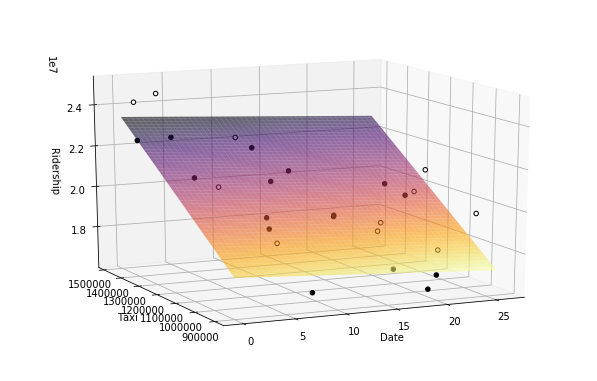

In [138]:
linear_regression_plot(df,y)

In [96]:
for column in df.columns:
        if df[column].dtype == 'datetime64[ns]':
            df['delta'] = (df[column] - df[column].min()).astype('timedelta64[D]')
            df[column] = df['delta']
            df = df.drop(['delta'], axis=1)
df.head()

,Date,Ridership
0,0.0,21082553.0
1,31.0,21228262.0
2,59.0,26170157.0
3,90.0,25656797.0
4,120.0,24342603.0


In [97]:
if len(df.columns) == 2:
    print(df.columns)
elif len(df.columns) ==3:
    print(df.columns)
else:
    print('can\'t plot it')

Index(['Date', 'Ridership'], dtype='object')


In [98]:
dependent_name = df.columns[y]
dependent_name

'Ridership'

In [99]:
features = [column for column in df]
independent = [feature for feature in features if feature != dependent_name]
independent

['Date']

In [100]:
y = df[dependent_name]
X = df[independent]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
X.iloc[:,2].min()

IndexError: single positional indexer is out-of-bounds

In [91]:
x1, x2 = np.meshgrid(np.linspace(X.iloc[:,1].min(), X.iloc[:,1].max(), 100), 
                       np.linspace(X.iloc[:,2].min(), X.iloc[:,2].max(), 100))

In [92]:
Z = model.params[0] + model.params[1] * x1 + model.params[2] * x2

In [121]:
'''fig = plt.figure(figsize=(8, 5))
ax = Axes3D(fig, azim=-115, elev=15)
surf = ax.plot_surface(x1, x2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)
resid = y - model.predict(X)

ax.scatter(X[resid >= 0].iloc[:,1], X[resid >= 0].iloc[:,2], y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].iloc[:,1], X[resid < 0].iloc[:,2], y[resid < 0], color='black', alpha=1.0)

ax.set_xlabel(independent[0])
ax.set_ylabel(independent[1])
ax.set_zlabel(dependent_name)'''

"fig = plt.figure(figsize=(8, 5))\nax = Axes3D(fig, azim=-115, elev=15)\nsurf = ax.plot_surface(x1, x2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)\nresid = y - model.predict(X)\n\nax.scatter(X[resid >= 0].iloc[:,1], X[resid >= 0].iloc[:,2], y[resid >= 0], color='black', alpha=1.0, facecolor='white')\nax.scatter(X[resid < 0].iloc[:,1], X[resid < 0].iloc[:,2], y[resid < 0], color='black', alpha=1.0)\n\nax.set_xlabel(independent[0])\nax.set_ylabel(independent[1])\nax.set_zlabel(dependent_name)"

In [94]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     45.04
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           7.51e-09
Time:                        20:23:23   Log-Likelihood:                -409.88
No. Observations:                  27   AIC:                             825.8
Df Residuals:                      24   BIC:                             829.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.353e+06   1.68e+06      5.553      0.000    5.88e+06    1.28e+07
Date        -947.2866    943.457     -1.004      0.325   -2894.486     999.912
Taxi           9.4975      1.241      7.651      0.000       6.935      12.059
==============================================================================
Omnibus:                        1.566   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                1.374
Skew:                           0.417   Prob(JB):                        0.503
Kurtosis:                       2.274   Cond. No.                     1.03e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

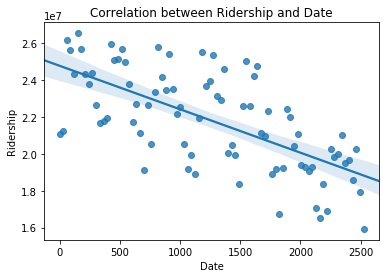

In [114]:
#plot = sns.regplot(x=independent[0], y=dependent_name, data=df)
#plt.title(f'Correlation between {dependent_name} and {independent[0]}')

In [115]:
plot